In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()
data = pd.read_csv("SolarEnergyData.csv")

Saving SolarEnergyData.csv to SolarEnergyData.csv


In [ ]:
data.shape

(32686, 11)

The data has 32686 samples

The data has 10 missing instances

In [ ]:
data.columns[data.isnull().sum()>0]

Index(['Radiation', 'Pressure', 'Humidity', 'WindDirection', 'Speed'], dtype='object')

In [ ]:
data.head(10)

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 0:00,23:55:26,1.21,48,30.46,59.0,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 0:00,23:50:23,1.21,48,30.46,58.0,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 0:00,23:45:26,1.23,48,30.46,57.0,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 0:00,23:40:21,1.21,48,30.46,60.0,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 0:00,23:35:24,1.17,48,30.46,62.0,104.95,5.62,6:13:00,18:13:00
5,1475227824,9/29/2016 0:00,23:30:24,1.21,48,30.46,64.0,120.20,5.62,6:13:00,18:13:00
6,1475227519,9/29/2016 0:00,23:25:19,1.20,49,30.46,72.0,112.45,6.75,6:13:00,18:13:00
7,1475227222,9/29/2016 0:00,23:20:22,1.24,49,30.46,71.0,122.97,5.62,6:13:00,18:13:00
8,1475226922,9/29/2016 0:00,23:15:22,1.23,49,30.46,80.0,101.18,4.50,6:13:00,18:13:00
9,1475226622,9/29/2016 0:00,23:10:22,1.21,49,30.46,85.0,141.87,4.50,6:13:00,18:13:00


In [ ]:
hh, mm, ss = data['TimeSunRise'][0].split(':')
print(int(hh) * 3600 + int(mm) * 60 + int(ss))

22380


There are missing instances in Radiation, Pressure, Humidity, WindDirection,and Speed.

In [ ]:
data['DayLength'] = data['TimeSunSet'] - data['TimeSunRise']
from datetime import datetime, date
import time
# print(d2-d1)
day_lengths = []

for i in range (0, 32686):
  hh, mm, ss = data['TimeSunRise'][i].split(':')
  d1 = int(hh) * 3600 + int(mm) * 60 + int(ss)

  hh, mm, ss = data['TimeSunSet'][i].split(':')
  d2 = int(hh) * 3600 + int(mm) * 60 + int(ss)
  day_lengths.append(d2-d1)

  

data['DayLength'] = np.array(day_lengths)

TypeError: ignored

In [ ]:
data.drop(['TimeSunSet', 'TimeSunRise'], axis=1, inplace = True)

In [ ]:
times = []
for i in range (0, 32686):
  hh, mm, ss = data['Time'][i].split(':')
  times.append(int(hh) * 3600 + int(mm) * 60 + int(ss))

data['Time'] = np.array(times)


In [ ]:
months = []
days = []

for d in data['Date']:
  stripped_date = datetime.strptime(d, "%m/%d/%Y %H:%M")
  months.append(stripped_date.month)
  day_of_year = date(stripped_date.year, stripped_date.month, stripped_date.day).timetuple().tm_yday
  days.append(day_of_year)
data['MonthOfYear'] = np.array(months)
data['DayOfYear'] = np.array(days)


NameError: ignored

In [ ]:
data['DayOfYear']

0        273
1        273
2        273
3        273
4        273
        ... 
32681    336
32682    336
32683    336
32684    336
32685    336
Name: DayOfYear, Length: 32686, dtype: int64

In [ ]:
data.drop('Date', axis=1, inplace=True)

In [ ]:
data.head()

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayLength,MonthOfYear,DayOfYear
0,1475229326,86126,1.21,48,30.46,59.0,177.39,5.62,43200,9,273
1,1475229023,85823,1.21,48,30.46,58.0,176.78,3.37,43200,9,273
2,1475228726,85526,1.23,48,30.46,57.0,158.75,3.37,43200,9,273
3,1475228421,85221,1.21,48,30.46,60.0,137.71,3.37,43200,9,273
4,1475228124,84924,1.17,48,30.46,62.0,104.95,5.62,43200,9,273


In [ ]:
print(data.isnull().sum().sum())
data.dropna(inplace = True)

10


In [ ]:
import seaborn as sns

correlation_mat = data.corr()

sns.heatmap(correlation_mat, annot = True, cmap = 'coolwarm', vmin=-1, vmax=1)

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression(fit_intercept=True)

x = data['Temperature']
y = data['Radiation']

X = x[:, np.newaxis]

model.fit(X, y)

print("MAE: ", mean_absolute_error(y, model.predict(X)))
print("MSE: ", mean_squared_error(y, model.predict(X)))
print("R2: ", r2_score(y, model.predict(X)))

MAE:  163.59198421765754
MSE:  45902.00053148554
R2:  0.5401387521611871


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
x = data['WindDirection']
y = data['Radiation']

X = x[:, np.newaxis]

model.fit(X, y)

print("MSE: ", mean_squared_error(y, model.predict(X)))
print("R2: ", r2_score(y, model.predict(X)))

MSE:  94521.2773949975
R2:  0.05305494168239899


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
x = data['Time']
y = data['Radiation']

X = x[:, np.newaxis]

model.fit(X, y)

print("Time vs Radiation")
print("MSE: ", mean_squared_error(y, model.predict(X)))
print("R2: ", r2_score(y, model.predict(X)))

Time vs Radiation
MSE:  99815.26865387897
R2:  1.8006512501389516e-05


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


(array([2.0361e+04, 1.4310e+03, 1.0990e+03, 1.1600e+03, 1.1140e+03,
        1.0390e+03, 8.2700e+02, 8.0400e+02, 7.6800e+02, 9.2900e+02,
        1.1490e+03, 1.0010e+03, 6.4900e+02, 2.4700e+02, 5.0000e+01,
        3.2000e+01, 1.0000e+01, 4.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([1.1100000e+00, 8.1117500e+01, 1.6112500e+02, 2.4113250e+02,
        3.2114000e+02, 4.0114750e+02, 4.8115500e+02, 5.6116250e+02,
        6.4117000e+02, 7.2117750e+02, 8.0118500e+02, 8.8119250e+02,
        9.6120000e+02, 1.0412075e+03, 1.1212150e+03, 1.2012225e+03,
        1.2812300e+03, 1.3612375e+03, 1.4412450e+03, 1.5212525e+03,
        1.6012600e+03]),
 <a list of 20 Patch objects>)

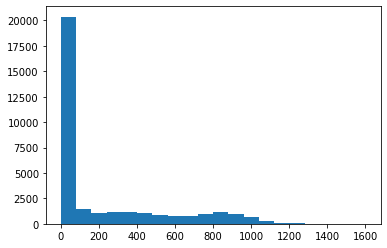

In [ ]:
plt.hist(data['Radiation'], bins = 20)

(array([  11.,  131.,  207.,  625., 1036., 4184., 2134., 5098., 4134.,
        3473., 2610., 2049., 2092.,  921., 1448., 1357.,  785.,  242.,
          87.,   53.]),
 array([34.  , 35.85, 37.7 , 39.55, 41.4 , 43.25, 45.1 , 46.95, 48.8 ,
        50.65, 52.5 , 54.35, 56.2 , 58.05, 59.9 , 61.75, 63.6 , 65.45,
        67.3 , 69.15, 71.  ]),
 <a list of 20 Patch objects>)

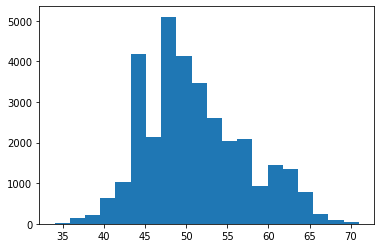

In [ ]:
plt.hist(data['Temperature'], bins = 20)

(array([  58.,  100.,  187.,  359.,  382.,  543.,  329.,  621.,  778.,
        1141., 2413., 4365., 6036., 3296., 5770., 3891., 1722.,  476.,
         144.,   66.]),
 array([30.19  , 30.2085, 30.227 , 30.2455, 30.264 , 30.2825, 30.301 ,
        30.3195, 30.338 , 30.3565, 30.375 , 30.3935, 30.412 , 30.4305,
        30.449 , 30.4675, 30.486 , 30.5045, 30.523 , 30.5415, 30.56  ]),
 <a list of 20 Patch objects>)

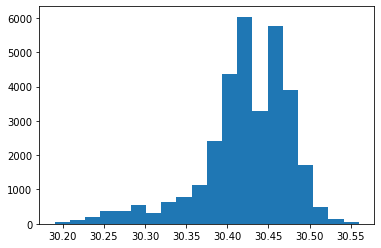

In [ ]:
plt.hist(data['Pressure'], bins = 20)

(array([1720., 1777., 1861., 1819., 1760., 1643., 2195., 2927., 4117.,
        4857., 2861.,  853.,  503.,  322.,  311.,  338.,  506.,  655.,
         779.,  873.]),
 array([9.00000e-02, 1.80830e+01, 3.60760e+01, 5.40690e+01, 7.20620e+01,
        9.00550e+01, 1.08048e+02, 1.26041e+02, 1.44034e+02, 1.62027e+02,
        1.80020e+02, 1.98013e+02, 2.16006e+02, 2.33999e+02, 2.51992e+02,
        2.69985e+02, 2.87978e+02, 3.05971e+02, 3.23964e+02, 3.41957e+02,
        3.59950e+02]),
 <a list of 20 Patch objects>)

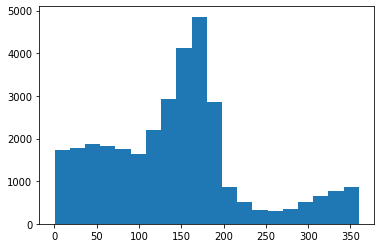

In [ ]:
plt.hist(data['WindDirection'], bins = 20)

(array([  19.,  289.,  700.,  999., 1292., 1038., 1203.,  711.,  868.,
        1022., 1191.,  820., 1154., 1262., 1589., 1548., 2292., 3829.,
        3815., 7036.]),
 array([  8.  ,  12.75,  17.5 ,  22.25,  27.  ,  31.75,  36.5 ,  41.25,
         46.  ,  50.75,  55.5 ,  60.25,  65.  ,  69.75,  74.5 ,  79.25,
         84.  ,  88.75,  93.5 ,  98.25, 103.  ]),
 <a list of 20 Patch objects>)

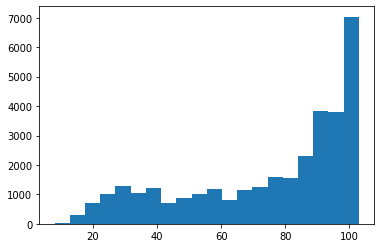

In [ ]:
plt.hist(data['Humidity'], bins = 20)

(array([1.864e+03, 6.648e+03, 9.111e+03, 7.876e+03, 4.221e+03, 1.083e+03,
        1.144e+03, 4.010e+02, 1.450e+02, 3.500e+01, 3.600e+01, 2.400e+01,
        2.600e+01, 1.600e+01, 1.500e+01, 9.000e+00, 1.100e+01, 6.000e+00,
        4.000e+00, 2.000e+00]),
 array([ 0.   ,  2.025,  4.05 ,  6.075,  8.1  , 10.125, 12.15 , 14.175,
        16.2  , 18.225, 20.25 , 22.275, 24.3  , 26.325, 28.35 , 30.375,
        32.4  , 34.425, 36.45 , 38.475, 40.5  ]),
 <a list of 20 Patch objects>)

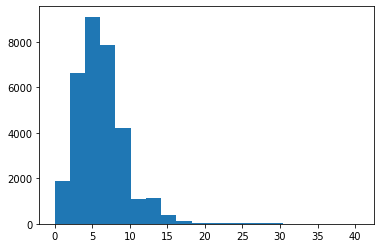

In [ ]:
plt.hist(data['Speed'], bins = 20)

In [ ]:
data['Radiation'][15000:15010]

15001    382.35
15002    307.80
15003    243.98
15004    281.32
15005    207.82
15006    272.24
15007    482.71
15008    457.33
15009    404.56
15010    287.83
Name: Radiation, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split 

X = data.copy(deep = True)
X.drop('Radiation', axis=1, inplace=True)

y = np.array(data['Radiation'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 42) 

from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import accuracy_score  

params = {'max_leaf_nodes': [50, 100, 500],  'max_depth': [3, 5,  10]}
tree1 = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, return_train_score=True)

tree1.fit(X_train, y_train)
tree1.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


DecisionTreeRegressor(max_depth=10, max_leaf_nodes=500, random_state=42)

In [ ]:
y_pred = tree1.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 43.25890746228777
Mean Squared Error: 10595.952066482065
Root Mean Squared Error: 102.93664102972306


In [ ]:
df = pd.DataFrame(tree1.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038780,0.000801,0.002838,0.000246,3,50,"{'max_depth': 3, 'max_leaf_nodes': 50}",0.710099,0.715055,0.703137,...,0.707398,0.006152,7,0.712770,0.705777,0.710452,0.711873,0.715536,0.711282,0.003214
1,0.040303,0.002745,0.002954,0.000403,3,100,"{'max_depth': 3, 'max_leaf_nodes': 100}",0.710099,0.715055,0.703137,...,0.707398,0.006152,7,0.712770,0.705777,0.710452,0.711873,0.715536,0.711282,0.003214
2,0.039773,0.001950,0.002859,0.000203,3,500,"{'max_depth': 3, 'max_leaf_nodes': 500}",0.710099,0.715055,0.703137,...,0.707398,0.006152,7,0.712770,0.705777,0.710452,0.711873,0.715536,0.711282,0.003214
3,0.059094,0.001753,0.003049,0.000556,5,50,"{'max_depth': 5, 'max_leaf_nodes': 50}",0.822851,0.843355,0.826688,...,0.826610,0.009044,4,0.833877,0.834178,0.830698,0.832002,0.836001,0.833351,0.001835
4,0.059009,0.000577,0.002775,0.000135,5,100,"{'max_depth': 5, 'max_leaf_nodes': 100}",0.822851,0.843355,0.826688,...,0.826610,0.009044,4,0.833877,0.834178,0.830698,0.832002,0.836001,0.833351,0.001835


In [ ]:
test_sizes = []
test_scores = []
train_scores = []

for t_size in np.arange(.1, 1, .1):
  test_sizes.append(t_size)
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t_size, random_state = 42) 
  params = {'max_leaf_nodes': [50, 100, 500],  'max_depth': [3, 5,  10]}
  tree1 = GridSearchCV(DecisionTreeRegressor(random_state=42), params, verbose=1, return_train_score=True)
  tree1.fit(X_train, y_train)
  
  y_pred_test = tree1.predict(X_test)
  test_scores.append(metrics.mean_squared_error(y_test, y_pred_test))

  y_pred_train = tree1.predict(X_train)
  train_scores.append(metrics.mean_squared_error(y_train, y_pred_train))
  
  # df = pd.DataFrame(tree1.cv_results_)
  # df = df.sort_index(axis=0 ,ascending=False)
  # max_test = df['mean_test_score'].max()
  # test_scores.append(max_test)
  # max_train = df.loc[df['mean_test_score'] == max_test]['mean_train_score']
  # train_scores.append(max_train[max_train.index[0]])


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


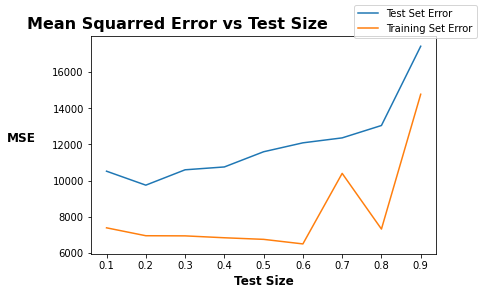

In [ ]:



fig, ax = plt.subplots()
ax.plot(test_sizes, test_scores)
ax.plot(test_sizes, train_scores)

#add axis labels
ax.set_ylabel('MSE', rotation='horizontal', fontsize=12, fontweight='bold')
ax.set_xlabel('Test Size', fontsize=12, fontweight='bold')
ax.set_title('Mean Squarred Error vs Test Size', x=.25, y=1.1, pad=-14, fontsize=16, fontweight='bold')

#adjust position of x-axis label
ax.yaxis.set_label_coords(-.2, .5)

plt.subplots_adjust(left=.1, right=.9)

fig.legend(['Test Set Error', 'Training Set Error'])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))



params = {'n_neighbors': [5, 100, 500], 'leaf_size': [30, 50, 100], 'algorithm': ['auto', 'ball_tree', 'kd_tree']}
knn = GridSearchCV(KNeighborsRegressor(), params, verbose=1)
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_test_std)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mean Absolute Error: 71.1477683100986
Mean Squared Error: 19025.978733732605
Root Mean Squared Error: 137.9346901027171


In [ ]:
#print(knn.scoring('accuracy'))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2) 
# params = {'n_estimators': [100, 250, 500, 1000]}
# rf = GridSearchCV(RandomForestRegressor(), params, verbose=1)
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 27.595647597919214
Mean Squared Error: 5522.81870397692
Root Mean Squared Error: 74.3156693031619


In [ ]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes = (10,),verbose = True, validation_fraction = .3)
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)
y_pred_train = nn.predict(X_train)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error(Training Set):', metrics.mean_absolute_error(y_train, y_pred_train))

NameError: ignored

In [ ]:
pred = rf.predict(X)
pred.size

32677

In [ ]:
data[0:287]['Time'].size

287

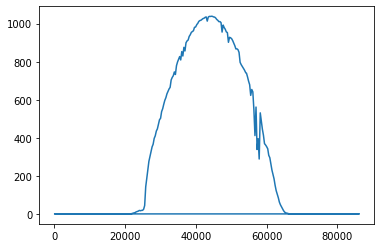

In [ ]:
plt.plot(data[0:287]['Time'], pred[0:287])

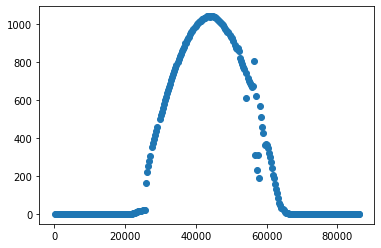

In [ ]:
plt.scatter(data[0:287]['Time'], y[0:287])

In [ ]:
fig = plt.figure()
scp = fig.add_subplot(111)

scp.plot(data[0:287]['Time'], pred[0:287], linewidth=2)
scp.plot(data[0:287]['Time'], y[0:287], color="red", linestyle="--")

scp.ylabel('Explained variance ratio')
scp.xlabel('Principal components')
scp.title('Variance Explained by Each Principal Component')

scp.legend(["Predicted", "Actual"])



NameError: ignored

In [ ]:
data.where(data['Time']<500)

,UNIXTime,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,DayLength,MonthOfYear,DayOfYear
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32684,1.480587e+09,302.0,1.23,44.0,30.42,101.0,164.19,7.87,39660.0,12.0,336.0


In [ ]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.transform(X_test)

from sklearn.decomposition import PCA #import PCA

pca = PCA() #call PCA class
X_train_pca = pca.fit_transform(X_train_std) #transform training set to subspace using PCA
X_test_pca = pca.transform(X_test_std) 
pca.explained_variance_ratio_  

array([4.33347389e-01, 1.50303127e-01, 1.19675319e-01, 9.18576272e-02,
       8.38154154e-02, 6.78177621e-02, 4.61085830e-02, 4.50524239e-03,
       2.56953449e-03, 2.16180465e-33])

In [ ]:
np.cumsum(pca.explained_variance_ratio_[0:7])

array([0.43334739, 0.58365052, 0.70332584, 0.79518346, 0.87899888,
       0.94681664, 0.99292522])

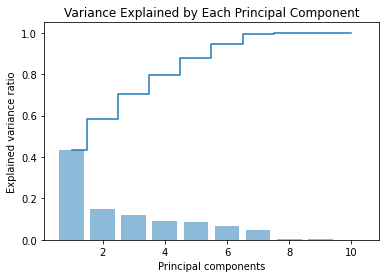

In [ ]:
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Explained by Each Principal Component')

plt.show()

In [ ]:
model = LinearRegression(fit_intercept=True)

model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 146.45039553345828
Mean Squared Error: 36753.453282007904
Root Mean Squared Error: 191.71190177453227


In [ ]:
new = data[['UNIXTime', 'Radiation']].copy()

NameError: ignored

In [ ]:
new.sort_values(by = 'UNIXTime', axis=0, inplace=True)

In [ ]:
new['UNIXTime'] = new['UNIXTime'] - 1472724008

In [ ]:
new['UNIXTime'] = new['UNIXTime']/86400

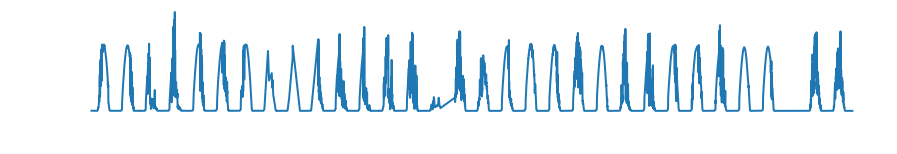

In [ ]:
fig = plt.figure(figsize=(15, 2))
scp = fig.add_subplot(111)
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}
plt.rcParams.update(params)
#fig.set_facecolor("k")
plt.ylabel('Radiation')
plt.xlabel('Days')


scp.plot(new['UNIXTime'][0:8000], new['Radiation'][0:8000], linewidth=2)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

params = {'n_clusters': [5, 7, 10, 25, 50], 'max_iter' : [200, 300, 400]}
kmc = GridSearchCV(KMeans(), params, verbose=1)
kmc.fit(X_train_std, y_train)

print(kmc.best_estimator_)

y_pred = kmc.predict(X_test_std)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))